In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import json
import requests
import tweepy

In [2]:
#read csv file downloaded manually

twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#download programmatically using the Requests library 

url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

response

<Response [200]>

In [5]:
with open('image_predictions.tsv',mode='wb') as file:
    file.write(response.content)

In [3]:
image_predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [26]:
tweets = []
for id in twitter_archive_df['tweet_id']:
    try:
        tweet = api.get_status(id, tweet_mode='extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweets.append(tweet)
        print('Tweet ID {}'.format(id))
    except:
        print('Deleted ID {}'.format(id))

Tweet ID 892420643555336193
Tweet ID 892177421306343426
Tweet ID 891815181378084864
Tweet ID 891689557279858688
Tweet ID 891327558926688256
Tweet ID 891087950875897856
Tweet ID 890971913173991426
Tweet ID 890729181411237888
Tweet ID 890609185150312448
Tweet ID 890240255349198849
Tweet ID 890006608113172480
Tweet ID 889880896479866881
Tweet ID 889665388333682689
Tweet ID 889638837579907072
Tweet ID 889531135344209921
Tweet ID 889278841981685760
Tweet ID 888917238123831296
Tweet ID 888804989199671297
Tweet ID 888554962724278272
Deleted ID 888202515573088257
Tweet ID 888078434458587136
Tweet ID 887705289381826560
Tweet ID 887517139158093824
Tweet ID 887473957103951883
Tweet ID 887343217045368832
Tweet ID 887101392804085760
Tweet ID 886983233522544640
Tweet ID 886736880519319552
Tweet ID 886680336477933568
Tweet ID 886366144734445568
Tweet ID 886267009285017600
Tweet ID 886258384151887873
Tweet ID 886054160059072513
Tweet ID 885984800019947520
Tweet ID 885528943205470208
Tweet ID 885518971

In [29]:
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweets, file)

In [4]:
tweets_df=pd.read_json('tweet_json.txt')
tweets_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",35517,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7509,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",30743,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5574,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",23104,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3691,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",38803,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7692,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",37084,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,8293,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [5]:
# Assessing 
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
twitter_archive_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [7]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
twitter_archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [9]:
twitter_archive_df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [10]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
image_predictions_df.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [13]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
image_predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [15]:
image_predictions_df.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [16]:
sum(image_predictions_df['jpg_url'].duplicated())

66

In [17]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
tweets_df

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",35517,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7509,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",30743,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5574,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",23104,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3691,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",38803,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7692,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",37084,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,8293,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",18698,False,Here we have a majestic great white breaching ...,NaN,...,NaN,NaN,NaN,NaN,2777,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",10872,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,NaN,NaN,NaN,NaN,1802,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",59884,False,When you watch your owner call another dog a g...,NaN,...,NaN,NaN,NaN,NaN,16815,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",25715,False,This is Zoey. She doesn't want to be one of th...,NaN,...,NaN,NaN,NaN,NaN,3831,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",29375,False,This is Cassie. She is a college pup. Studying...,NaN,...,NaN,NaN,NaN,NaN,6529,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [19]:
tweets_df.shape

(2331, 32)

In [20]:
tweets_df.dtypes

contributors                            float64
coordinates                             float64
created_at                       datetime64[ns]
display_text_range                       object
entities                                 object
extended_entities                        object
favorite_count                            int64
favorited                                  bool
full_text                                object
geo                                     float64
id                                        int64
id_str                                    int64
in_reply_to_screen_name                  object
in_reply_to_status_id                   float64
in_reply_to_status_id_str               float64
in_reply_to_user_id                     float64
in_reply_to_user_id_str                 float64
is_quote_status                            bool
lang                                     object
place                                    object
possibly_sensitive                      

In [21]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [22]:
tweets_df.isnull().sum()

contributors                     2331
coordinates                      2331
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 272
favorite_count                      0
favorited                           0
full_text                           0
geo                              2331
id                                  0
id_str                              0
in_reply_to_screen_name          2254
in_reply_to_status_id            2254
in_reply_to_status_id_str        2254
in_reply_to_user_id              2254
in_reply_to_user_id_str          2254
is_quote_status                     0
lang                                0
place                            2330
possibly_sensitive                134
possibly_sensitive_appealable     134
quoted_status                    2307
quoted_status_id                 2305
quoted_status_id_str             2305
quoted_status_permalink          2305
retweet_coun

In [23]:
tweets_df['id']

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
5       891087950875897856
6       890971913173991426
7       890729181411237888
8       890609185150312448
9       890240255349198849
10      890006608113172480
11      889880896479866881
12      889665388333682689
13      889638837579907072
14      889531135344209921
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
19      888078434458587136
20      887705289381826560
21      887517139158093824
22      887473957103951883
23      887343217045368832
24      887101392804085760
25      886983233522544640
26      886736880519319552
27      886680336477933568
28      886366144734445568
29      886267009285017600
               ...        
2301    666411507551481857
2302    666407126856765440
2303    666396247373291520
2304    666373753744588802
2305    666362758909284353
2306    666353288456101888
2

In [24]:
tweets_df.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2331.000000,0.0,2.331000e+03,2.331000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2197.0,2197.0,2.600000e+01,2.600000e+01,2331.000000
mean,NaN,NaN,7421.389532,NaN,7.419079e+17,7.419079e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.0,0.0,8.113972e+17,8.113972e+17,2641.722866
std,NaN,NaN,11524.460533,NaN,6.823170e+16,6.823170e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.0,0.0,6.295843e+16,6.295843e+16,4467.463615
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,1.000000
25%,NaN,NaN,1290.000000,NaN,6.782670e+17,6.782670e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.0,0.0,7.761338e+17,7.761338e+17,535.500000
50%,NaN,NaN,3223.000000,NaN,7.182469e+17,7.182469e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.281173e+17,8.281173e+17,1236.000000
75%,NaN,NaN,9079.500000,NaN,7.986692e+17,7.986692e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.637581e+17,8.637581e+17,3066.500000
max,NaN,NaN,153185.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,75906.000000


In [25]:
all_columns= pd.Series(list(twitter_archive_df)+list(image_predictions_df)+list(tweets_df))
all_columns[all_columns.duplicated()]

17                 tweet_id
42    in_reply_to_status_id
44      in_reply_to_user_id
58                   source
dtype: object

## Assessing Document

### Quality

#### twitter_archive_df
- only want original ratings (no retweets) that have images.

- delete unnecessary columns 'in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp','expanded_url' 

-  incorrect data types, change'timestamp' to datetime instead of object
- 'rating_numerator', and 'rating_denominator'  have invalid values as '1','2'
- Name contain 'None', 'a', 'an', 'the'

#### image_predictions_df
- delete img_num column
- delete rows with null jpg_url 
- delete rows with duplicated jpg_url

#### tweets_df
- rename id in tweets_clean to tweet_id
- delete unnecessary columns

### Messy (Tidiness Issues)
- merge favorite_count and retweet_count to twitter_archive
- dog Stages in twitter_archive_df should be in one column as it is 1 variable
- predictions (p1,p2,p3) in image_predictions_df should be in one column
- p_conf (1,2,3) in image_predictions_df should be in one column
- Merge 'image_predictions_df'into 'twitter_archive_df'.


# Clean

In [26]:
twitter_archive_clean = twitter_archive_df.copy()
image_predictions_clean = image_predictions_df.copy()
tweets_clean = tweets_df.copy()

#### Define 
- (q1) rename id in tweets_clean to tweet_id
- (T1) merge favorite_count and retweet_count to twitter_archive_clean

#### Code

In [27]:
tweets_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

In [28]:
list(tweets_clean)

['contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'tweet_id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'truncated',
 'user']

In [29]:
tweets_new = tweets_clean[['tweet_id','favorite_count','retweet_count']]

In [30]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweets_new,
                            on=['tweet_id'], how='left')

#### Test

In [31]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'favorite_count',
 'retweet_count']

##### Define
(q2) delete 181 retweets.

##### Code

In [32]:
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

##### Test

In [33]:
# the original was 2356
twitter_archive_clean.shape

(2175, 19)

#### Define
- create column dog_Stage in twitter_archive_clean
- (t2) melt ['doggo','floofer','pupper','puppo'] in dog_stage

#### Code

In [34]:
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp',
                           'source','text','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',
                           'expanded_urls','rating_numerator','rating_denominator','name',
                           'favorite_count','retweet_count'],
                           var_name='stages', value_name='dog_stage')

twitter_archive_clean = twitter_archive_clean.drop('stages', axis=1)

twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep= 'last')


#### Test

In [35]:
twitter_archive_clean.shape

(2175, 16)

In [36]:
twitter_archive_clean['dog_stage'].value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_stage, dtype: int64

#### Define
- (t3) create prediction column of (p1,p2,p3) in image_predictions_clean
- (t4) creat confidence column of p_conf (1,2,3) in image_predictions_clean

#### Code

In [37]:
# reference https://github.com/kaish114/Wrangle-and-Analyze-Data/blob/master/wrangle_act.ipynb
prediction = []
p_confidence = []
def image(image_predictions_clean):
    if image_predictions_clean['p1_dog'] == True:
        prediction.append(image_predictions_clean['p1'])
        p_confidence.append(image_predictions_clean['p1_conf'])
    elif image_predictions_clean['p2_dog'] == True:
        prediction.append(image_predictions_clean['p2'])
        p_confidence.append(image_predictions_clean['p2_conf'])
    elif image_predictions_clean['p3_dog'] == True:
        prediction.append(image_predictions_clean['p3'])
        p_confidence.append(image_predictions_clean['p3_conf'])
    else:
        prediction.append(np.NaN)
        p_confidence.append(np.NaN)
        
image_predictions_clean.apply(image, axis=1)

image_predictions_clean['prediction'] = prediction
image_predictions_clean['p_confidence'] = p_confidence        


#### Test

In [38]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,prediction,p_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [39]:
list(image_predictions_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'prediction',
 'p_confidence']

#### Define
- (q3) delete un necessary columns in image_predictions_clean icluding img_num

#### Code

In [40]:
image_predictions_clean = image_predictions_clean.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], 1)

#### Test

In [41]:
list(image_predictions_clean)

['tweet_id', 'jpg_url', 'prediction', 'p_confidence']

##### Define

- (q4) delete 'in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'

##### Code

In [42]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], 1)

##### Test

In [43]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorite_count',
 'retweet_count',
 'dog_stage']

#### Define
- (t5) Merge 'image_predictions_clean' into 'twitter_archive_clean'.

#### Code

In [44]:
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean,
                            on=['tweet_id'], how='left')

#### Test

In [45]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorite_count',
 'retweet_count',
 'dog_stage',
 'jpg_url',
 'prediction',
 'p_confidence']

##### Define
- (q5) change'timestamp' to datetime instead of object

##### Code

In [46]:
twitter_archive_clean['timestamp']= pd.to_datetime(twitter_archive_clean['timestamp'])


##### Test

In [47]:
twitter_archive_clean.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
text                          object
rating_numerator               int64
rating_denominator             int64
name                          object
favorite_count               float64
retweet_count                float64
dog_stage                     object
jpg_url                       object
prediction                    object
p_confidence                 float64
dtype: object

#### Define
- (q6) delete dublicate jpg_url
- (q7) delete null jpg_url 

#### code

In [57]:
twitter_archive_clean.drop_duplicates(subset='jpg_url', inplace=True)
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['jpg_url'].notnull()]

#### Test

In [58]:
sum(twitter_archive_clean['jpg_url'].duplicated())

0

In [59]:
twitter_archive_clean['jpg_url']

0       https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg
1       https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg
2       https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg
3       https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg
4       https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg
5       https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg
6       https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg
7       https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg
8       https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg
9       https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg
10      https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg
11      https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg
12      https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg
13      https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg
14      https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg
15      https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg
16      https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg
17      https://pbs.twimg.com/media/CUQ_QahUAAAV

##### Define
- (q8) change 'rating_numerator', and 'rating_denominator' of 666287406224695296 as it have invalid values '1/2' instead of 9/10

##### Code

In [54]:
# 2335
twitter_archive_clean['rating_denominator'].value_counts()

10     1976
50        3
80        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [55]:
# 666287406224695296
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

##### Test

In [56]:
twitter_archive_clean['rating_denominator'].value_counts()

10     1977
50        3
80        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
Name: rating_denominator, dtype: int64

##### Define
- (q9) change name contain 'None', 'a', 'an', 'the' to Nan

##### Code

In [63]:
twitter_archive_clean['name'].value_counts()

None        546
a            55
Charlie      11
Lucy         10
Cooper       10
Oliver       10
Tucker        9
Penny         9
Sadie         8
Winston       8
Daisy         7
Lola          7
the           7
Toby          7
Jax           6
Stanley       6
Bo            6
Koda          6
Bella         6
an            6
Bailey        5
Buddy         5
Leo           5
Oscar         5
Rusty         5
Milo          5
Scout         5
Louis         5
Chester       5
Dave          5
           ... 
Jazzy         1
Jessifer      1
Stella        1
Jennifur      1
Bilbo         1
Kaia          1
Godi          1
Gustav        1
Autumn        1
Lupe          1
Lizzie        1
Geno          1
Jackie        1
Olaf          1
Tayzie        1
Striker       1
Tater         1
Katie         1
Carbon        1
Sky           1
Bruno         1
Hermione      1
Dot           1
Astrid        1
Luther        1
Jett          1
Dallas        1
Evy           1
Mabel         1
Chadrick      1
Name: name, Length: 936,

In [67]:
twitter_archive_clean['name'].replace(['a','an','the','None'],np.nan,inplace = True)

##### Test

In [68]:
twitter_archive_clean['name'].value_counts()

Charlie     11
Lucy        10
Cooper      10
Oliver      10
Tucker       9
Penny        9
Sadie        8
Winston      8
Toby         7
Daisy        7
Lola         7
Stanley      6
Koda         6
Bo           6
Bella        6
Jax          6
Buddy        5
Leo          5
Oscar        5
Chester      5
Louis        5
Bailey       5
Milo         5
Rusty        5
Dave         5
Scout        5
Bentley      4
Brody        4
Phil         4
Derek        4
            ..
Jazzy        1
Jessifer     1
Stella       1
Jennifur     1
Bilbo        1
Kaia         1
Godi         1
Gustav       1
Autumn       1
Lupe         1
Lizzie       1
Geno         1
Jackie       1
Olaf         1
Tayzie       1
Striker      1
Tater        1
Katie        1
Carbon       1
Sky          1
Bruno        1
Hermione     1
Dot          1
Astrid       1
Luther       1
Jett         1
Dallas       1
Evy          1
Mabel        1
Chadrick     1
Name: name, Length: 932, dtype: int64

## Storing, Analyzing, and Visualizing Data for this Project

In [70]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

In [71]:
df=pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage,jpg_url,prediction,p_confidence
0,667443425659232256,2015-11-19 20:44:47,Exotic dog here. Long neck. Weird paws. Obsess...,6,10,NaN,732.0,537.0,None,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,NaN,NaN
1,667453023279554560,2015-11-19 21:22:56,Meet Cupcake. I would do unspeakable things fo...,11,10,Cupcake,296.0,81.0,None,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.825670
2,667455448082227200,2015-11-19 21:32:34,This is Reese and Twips. Reese protects Twips....,7,10,Reese,180.0,56.0,None,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376
3,667470559035432960,2015-11-19 22:32:36,This is a northern Wahoo named Kohl. He runs t...,11,10,NaN,237.0,89.0,None,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,toy_poodle,0.304175
4,667491009379606528,2015-11-19 23:53:52,Two dogs in this one. Both are rare Jujitsu Py...,7,10,NaN,490.0,208.0,None,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,borzoi,0.852088


In [75]:
df.dog_stage.value_counts()

None       1688
pupper      212
doggo        63
puppo        23
floofer       8
Name: dog_stage, dtype: int64

#### pupper is the maximum numbers of rated the dog stages

In [95]:
df['dog_stage'].replace(['None'],np.nan,inplace = True)

In [96]:
pupper_rating = df.dog_stage.value_counts()['pupper']
pupper_rating

212

In [97]:
total_rating = df.dog_stage.count()
total_rating

306

In [98]:
pupper_percentage= pupper_rating/total_rating *100
pupper_percentage

69.281045751633982

In [101]:
labels = np.full(len(df.dog_stage.value_counts()), '', dtype=object)
labels[0]='pupper'

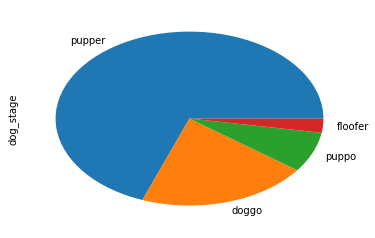

In [100]:
df.dog_stage.value_counts().plot(kind = 'pie')

#### predictions 

In [105]:
df.prediction.value_counts()

golden_retriever                  158
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
pug                                62
toy_poodle                         51
chow                               48
Pomeranian                         42
Samoyed                            42
malamute                           33
French_bulldog                     31
Chesapeake_Bay_retriever           31
cocker_spaniel                     30
miniature_pinscher                 25
Eskimo_dog                         22
German_shepherd                    21
Staffordshire_bullterrier          21
Cardigan                           21
Siberian_husky                     20
beagle                             20
Shih-Tzu                           20
Shetland_sheepdog                  19
Rottweiler                         19
Maltese_dog                        19
Lakeland_terrier                   18
kuvasz                             18
basset      

#### golden retriever is the most dog type

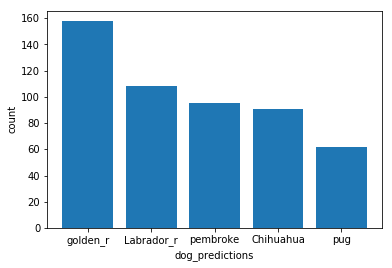

In [109]:
locations = [1,2,3,4,5]
heights = [158,108,95,91,62]
labels = ['golden_r', 'Labrador_r','pembroke','Chihuahua','pug']
plt.bar(locations, heights, tick_label=labels)
plt.xlabel('dog_predictions')
plt.ylabel('count');

## mean of favourite count based on the dog stage

In [113]:
mean_fav = df.groupby('dog_stage').mean().favorite_count
mean_fav

dog_stage
doggo      18537.919355
floofer    12293.375000
pupper      6787.429245
puppo      21582.695652
Name: favorite_count, dtype: float64

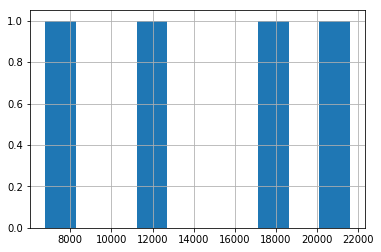

In [114]:
mean_fav.hist();